### **SI 618: Data Manipulation and Analysis** 🎓  
#### Lesson 07: Beyond Regex — Natural Language Processing
👤 *Instructor: Dr. Chris Teplovs*  
🏫 *School of Information, University of Michigan*  
© 2024. *This notebook may not be shared outside the course without permission.*

* 📅 Please Ensure You Have This Version:
**Version 2024.10.8.1.CT**

# 📋 Updates
- 🔹 **Project Team Formation**: Make sure to connect with your team members and establish roles for efficient collaboration!

In [224]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# spaCy

- ⚡ **Fast and Extensible NLP Package for Python**  
  Check it out here: [spaCy Official Website](https://spacy.io/)

- **🔗 Installation Note**:  
  Make sure to install the spaCy package and download the English corpus:

  ```bash
  pip install spacy
  python -m spacy download en_core_web_sm

In [225]:
import spacy

In [3]:
%pip install spacy
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.6 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [227]:
# loading up the language model: English
# note that Windows users might need to figure out where
# the previous cell installed the library and change the following line accordingly
# https://spacy.io/models/en
nlp = spacy.load('en_core_web_sm')

In [228]:
# from Make It Stick: The Science of Successful Learning
sentences = """Michael Young is a high-achieving fourth-year medical
student at Georgia Regents University who pulled himself up from rock
bottom by changing the way he studies. Young entered medical school
without the usual foundation of premed coursework. His classmates all had
backgrounds in biochemistry, pharmacology, and the like. Medical
school is plenty tough under any circumstances, but in Young's
case even more so for lack of a footing."""

In [229]:
print(sentences)

Michael Young is a high-achieving fourth-year medical
student at Georgia Regents University who pulled himself up from rock
bottom by changing the way he studies. Young entered medical school
without the usual foundation of premed coursework. His classmates all had
backgrounds in biochemistry, pharmacology, and the like. Medical
school is plenty tough under any circumstances, but in Young's
case even more so for lack of a footing.


In [230]:
sentences

"Michael Young is a high-achieving fourth-year medical\nstudent at Georgia Regents University who pulled himself up from rock\nbottom by changing the way he studies. Young entered medical school\nwithout the usual foundation of premed coursework. His classmates all had\nbackgrounds in biochemistry, pharmacology, and the like. Medical\nschool is plenty tough under any circumstances, but in Young's\ncase even more so for lack of a footing."

### 🎯 Goal: Calculate Word Frequency  
- **Objective**: Identify the most frequently occurring words in the text to gain insights into the dominant themes or topics.
- **Outcome**: Generate a **word frequency summary** to highlight which terms are used most often.

#### Normalizing the text by lowering the case

In [231]:
type(sentences)

str

In [232]:
sentences_lower = sentences.lower()
sentences_lower

"michael young is a high-achieving fourth-year medical\nstudent at georgia regents university who pulled himself up from rock\nbottom by changing the way he studies. young entered medical school\nwithout the usual foundation of premed coursework. his classmates all had\nbackgrounds in biochemistry, pharmacology, and the like. medical\nschool is plenty tough under any circumstances, but in young's\ncase even more so for lack of a footing."

## 🧹 0-2. Remove Punctuation and Special Characters
- **Method 1**: Exclude special characters one by one.
- **Method 2**: Use a **regular expression** to efficiently remove all punctuation and special characters in one step.  
  - This approach saves time as you don’t need to manually specify each character.
  
🔗 Useful Resources:  
- [Python `re` Library Documentation](https://docs.python.org/3.4/library/re.html)  
- [Regular Expression on Wikipedia](https://en.wikipedia.org/wiki/Regular_expression)

In [233]:
# https://docs.python.org/3.4/library/re.html
# https://en.wikipedia.org/wiki/Regular_expression
# https://rampion.github.io/RegHex/
# https://www.linkedin.com/in/karina-hauser-7017b7125
sentences_lower_no_punctuation = re.sub(r'[^\w\s]+', ' ', sentences_lower)
sentences_lower_no_punctuation

'michael young is a high achieving fourth year medical\nstudent at georgia regents university who pulled himself up from rock\nbottom by changing the way he studies  young entered medical school\nwithout the usual foundation of premed coursework  his classmates all had\nbackgrounds in biochemistry  pharmacology  and the like  medical\nschool is plenty tough under any circumstances  but in young s\ncase even more so for lack of a footing '

And still one more way:

In [234]:
# You can use the string package to get a list of punctuation characters
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [235]:
# remove punctuation and special characters from the sentences_lower string using maketrans:
sentences_lower_no_punctuation = sentences_lower.translate(
    str.maketrans('', '', string.punctuation))


# Going to show you a very commonly used function for search and replacing (this is R documentation but grep exists outside of R
# https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/grep
# https://en.wikipedia.org/wiki/Grep#:~:text=Its%20name%20comes%20from%20the,others%20such%20as%20OS%2D9.

Remember our task at hand: determining the frequency of each word in a document.

- Split the paragraph into a list of words

In [236]:
words = sentences_lower_no_punctuation.split()
# We are doing a basic "Split tokenizer" to turn our documents into "tokens" (tokens can be words, sentences, paragraphs, etc.)
# it depends on the problem you are trying to solve. I sometimes refer to tokens as "chunks"

In [237]:
words[:10]

['michael',
 'young',
 'is',
 'a',
 'highachieving',
 'fourthyear',
 'medical',
 'student',
 'at',
 'georgia']

- Count the words from the list
- Words that can occur in any kind of paragraphs...?

In [238]:
d = {}
for word in words:
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1
d

# Here is a way to breakdown and get the frequency of words in a document

{'michael': 1,
 'young': 2,
 'is': 2,
 'a': 2,
 'highachieving': 1,
 'fourthyear': 1,
 'medical': 3,
 'student': 1,
 'at': 1,
 'georgia': 1,
 'regents': 1,
 'university': 1,
 'who': 1,
 'pulled': 1,
 'himself': 1,
 'up': 1,
 'from': 1,
 'rock': 1,
 'bottom': 1,
 'by': 1,
 'changing': 1,
 'the': 3,
 'way': 1,
 'he': 1,
 'studies': 1,
 'entered': 1,
 'school': 2,
 'without': 1,
 'usual': 1,
 'foundation': 1,
 'of': 2,
 'premed': 1,
 'coursework': 1,
 'his': 1,
 'classmates': 1,
 'all': 1,
 'had': 1,
 'backgrounds': 1,
 'in': 2,
 'biochemistry': 1,
 'pharmacology': 1,
 'and': 1,
 'like': 1,
 'plenty': 1,
 'tough': 1,
 'under': 1,
 'any': 1,
 'circumstances': 1,
 'but': 1,
 'youngs': 1,
 'case': 1,
 'even': 1,
 'more': 1,
 'so': 1,
 'for': 1,
 'lack': 1,
 'footing': 1}

In [239]:
from collections import defaultdict
d = defaultdict(int)
for word in words:
    d[word] += 1


# Printing the default dictionary
# https://www.geeksforgeeks.org/defaultdict-in-python/
print(d)

defaultdict(<class 'int'>, {'michael': 1, 'young': 2, 'is': 2, 'a': 2, 'highachieving': 1, 'fourthyear': 1, 'medical': 3, 'student': 1, 'at': 1, 'georgia': 1, 'regents': 1, 'university': 1, 'who': 1, 'pulled': 1, 'himself': 1, 'up': 1, 'from': 1, 'rock': 1, 'bottom': 1, 'by': 1, 'changing': 1, 'the': 3, 'way': 1, 'he': 1, 'studies': 1, 'entered': 1, 'school': 2, 'without': 1, 'usual': 1, 'foundation': 1, 'of': 2, 'premed': 1, 'coursework': 1, 'his': 1, 'classmates': 1, 'all': 1, 'had': 1, 'backgrounds': 1, 'in': 2, 'biochemistry': 1, 'pharmacology': 1, 'and': 1, 'like': 1, 'plenty': 1, 'tough': 1, 'under': 1, 'any': 1, 'circumstances': 1, 'but': 1, 'youngs': 1, 'case': 1, 'even': 1, 'more': 1, 'so': 1, 'for': 1, 'lack': 1, 'footing': 1})


In [240]:
from collections import Counter
# https://docs.python.org/3/library/collections.html#collections.Counter
# A counter class is a dictionary subclass for counting hashable objects. 
# It is a collection where elements are stored as dictionary keys and 
# their counts are stored as dictionary values.

In [241]:
Counter(words).most_common(20)

[('medical', 3),
 ('the', 3),
 ('young', 2),
 ('is', 2),
 ('a', 2),
 ('school', 2),
 ('of', 2),
 ('in', 2),
 ('michael', 1),
 ('highachieving', 1),
 ('fourthyear', 1),
 ('student', 1),
 ('at', 1),
 ('georgia', 1),
 ('regents', 1),
 ('university', 1),
 ('who', 1),
 ('pulled', 1),
 ('himself', 1),
 ('up', 1)]

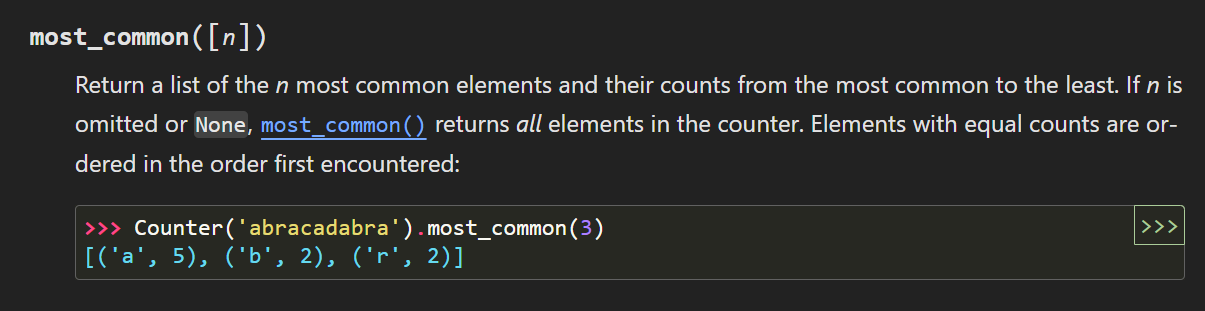

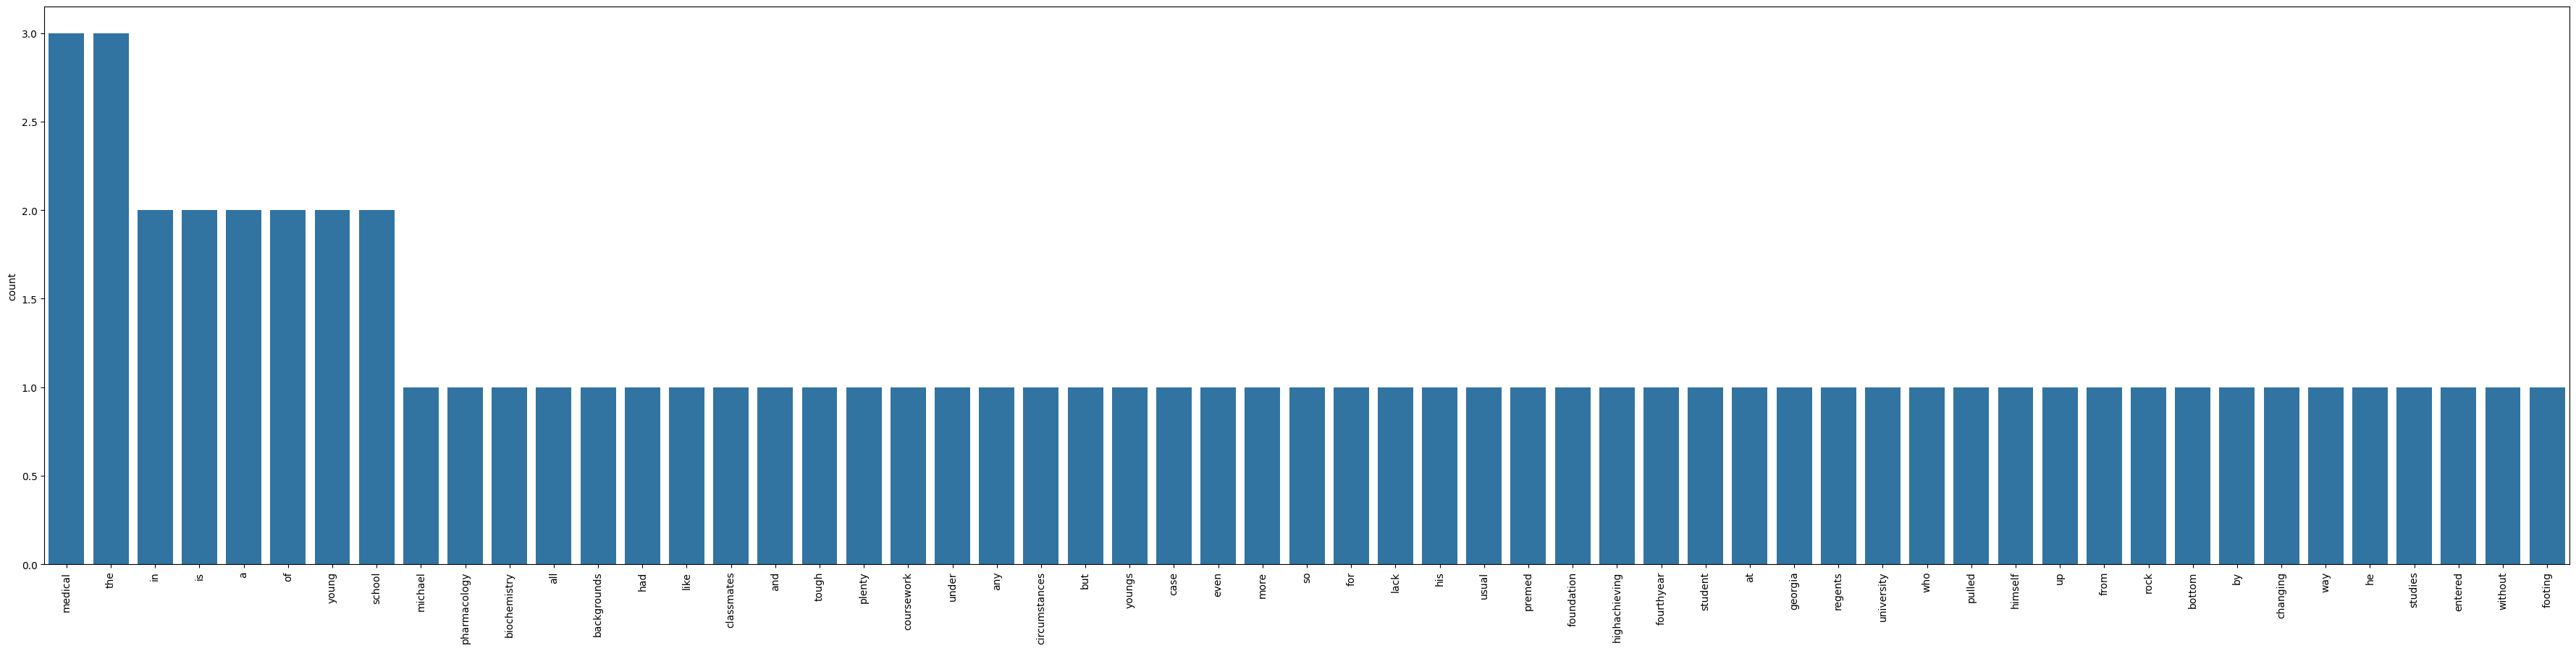

In [242]:
plt.figure(figsize=(45,10))
sns.countplot(x=words, order=pd.Series(words).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

## 🛑 0-3. Remove Stop Words
- **Stop words** refer to the most common words in a language (e.g., *the*, *is*, *and*).  
- **Why Remove Them?**  
  - Stop words add little semantic value and are often removed to improve the performance of NLP models.
  - There is **no single universal stopword list**, as it varies depending on the application and language.
  
🔗 **Learn More**:
- [Stop Words on Wikipedia](https://en.wikipedia.org/wiki/Stop_words)
- [Most Common Words in English](https://en.wikipedia.org/wiki/Most_common_words_in_English)​⬤

### 📥 Importing Stop Words from `spaCy`

In [243]:
from spacy.lang.en.stop_words import STOP_WORDS
# https://en.wikipedia.org/wiki/Stop_word
# https://en.wikipedia.org/wiki/Most_common_words_in_English

In [244]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [245]:
#or if the stopwords are provided
with open('stopwords.txt', 'r') as file:
    stopwords = file.read().splitlines()

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

### 🎯 Goal: Count Word Frequency  
We aim to calculate the frequency of each word in the paragraph to identify which words best represent its content.

- **Note**: Our paragraph is stored as a **single string object**.

### After Removing Stopwords:
- We can focus on the meaningful words that convey the core message of the paragraph.

In [246]:
words_no_stopwords = list()
for word in words:
    if word not in STOP_WORDS:
        words_no_stopwords.append(word)

### 🚀 **Challenge 1:**  Re-implement the Code Using List Comprehension</font>
Re-write the code from the previous cell using a more concise and Pythonic approach with **list comprehension**.

In [247]:
# Use pyhon list comprehension to remove stopwords
words_no_stopwords = [word for word in words if word not in STOP_WORDS]

### 🚀 **Challenge 2:** Use `Counter` to Find Word Frequencies</font>
Utilize Python’s **`Counter`** class to efficiently compute the frequency of each word in the `words_nostop` list.

In [248]:
# use python's Counter class to get the frequency of words
Counter(words_no_stopwords)

Counter({'medical': 3,
         'young': 2,
         'school': 2,
         'michael': 1,
         'highachieving': 1,
         'fourthyear': 1,
         'student': 1,
         'georgia': 1,
         'regents': 1,
         'university': 1,
         'pulled': 1,
         'rock': 1,
         'changing': 1,
         'way': 1,
         'studies': 1,
         'entered': 1,
         'usual': 1,
         'foundation': 1,
         'premed': 1,
         'coursework': 1,
         'classmates': 1,
         'backgrounds': 1,
         'biochemistry': 1,
         'pharmacology': 1,
         'like': 1,
         'plenty': 1,
         'tough': 1,
         'circumstances': 1,
         'youngs': 1,
         'case': 1,
         'lack': 1,
         'footing': 1})

### 🚀 **Challenge 3:** Create a Bar Chart for the Top 10 Most Frequent Words
- Display the **10 most common words**, sorted **alphabetically**.
- Use a **bar chart** to visualize the frequency of these words.

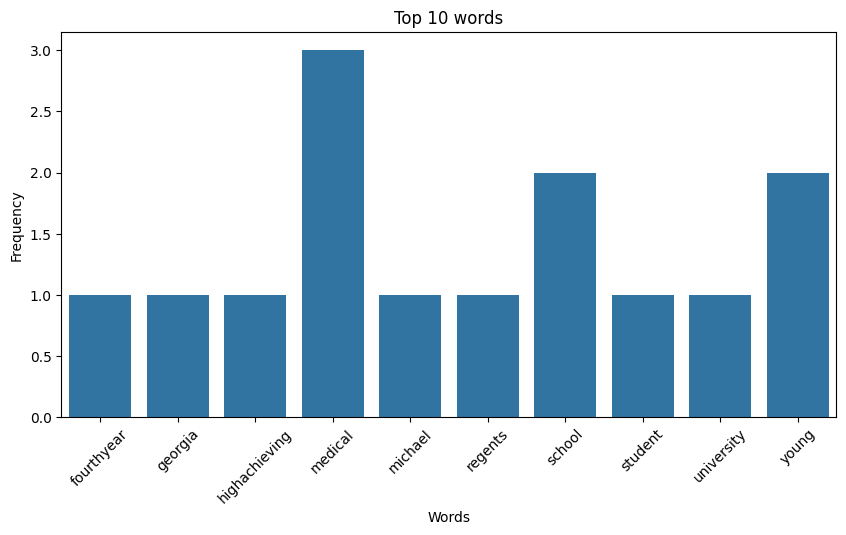

In [249]:
# display the 10 most common words, sorted alphabetically
top_10_words = Counter(words_no_stopwords).most_common(10)
top_10_words.sort(key=lambda x: x[0])
words, frequencies = zip(*top_10_words)

plt.figure(figsize=(10,5))
sns.barplot(x=words, y=frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words')
plt.xticks(rotation=45)
plt.show()


# 1. Extracting Linguistic Features with spaCy
## ✂️ 1-1. Tokenization
- **Token**: A semantic unit for analysis  
  - Loosely equivalent to a *word*.  
  - Example: `sent_low_pnct.split()`

### ⚠️ Tricky Cases in Tokenization:
- **Contractions**:  
  - Example: *aren't* → Split as: `are` + `n't`

- **Names with Apostrophes**:  
  - Example: *O'Neil* → May be split into multiple tokens depending on the context.

For more details on tokenization, refer to the [Stanford Tokenization Guide](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html).

---

### 🔧 Tokenization with `spaCy`:
- In `spaCy`, tokens can be of various types:
  - **Word**, **Punctuation Symbol**, **Whitespace**, etc.

### 🔍 Let’s Dissect the Sentence!
- **Initialize the `spaCy` Object** to start tokenizing and analyzing text.

In [250]:
# https://en.wikipedia.org/wiki/SpaCy
# https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html
# examples partially taken from (now defunct) https://nlpforhackers.io/complete-guide-to-spacy/
import spacy
nlp = spacy.load('en_core_web_sm')

In [251]:
type(nlp)

spacy.lang.en.English

- Our sentence: "Hello World!"
    - Pass the sentence string to the ```spaCy``` object ```nlp```

In [252]:
doc = nlp("Hello World!")

- The sentence is considered as a short document.

In [253]:
print(type(doc), doc)

<class 'spacy.tokens.doc.Doc'> Hello World!


- When we import the sentence string, **`spaCy`** automatically **splits the sentence into tokens**.  
  - This process is known as **tokenization**!

In [254]:
for i,token in enumerate(doc):
    print(i, token)

0 Hello
1 World
2 !


- Each token is also accompanied by its **index information**, indicating its **location within the sentence**.

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11|
|---|---|---|---|---|---|---|---|---|---|---|---|
| H | e | l | l | o | _ | W | o | r | l | d | ! |

In [255]:
for i, token in enumerate(doc):
    print(i, token.text, token.idx)


0 Hello 0
1 World 6
2 ! 11


- **And Much More!**  
  - Explore additional token attributes in the [spaCy Token API Documentation](https://spacy.io/api/token#attributes).

In [256]:
# We are going to take a look back at the sentences we were using earlier
sentences

"Michael Young is a high-achieving fourth-year medical\nstudent at Georgia Regents University who pulled himself up from rock\nbottom by changing the way he studies. Young entered medical school\nwithout the usual foundation of premed coursework. His classmates all had\nbackgrounds in biochemistry, pharmacology, and the like. Medical\nschool is plenty tough under any circumstances, but in Young's\ncase even more so for lack of a footing."

In [257]:
# NLP is a an NLP pipeline object that processes the text input
doc = nlp(sentences)

# The result 'doc' is a spacy.tokens.doc.Doc object containing tokens with rich linguistic annotations

print("text\tidx\tlemma\tlower\tpunct\tspace\tshape\tPOS")


# This loop will print out the token text, index, lemma, lowercase, punctuation, space, shape, and POS tag

# the . notation is used to access the attributes of the token object
for token in doc:
    if token.is_space:
        print("SPACE")
    else:
        print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
            token.text,
            token.idx,
            token.lemma_,
            token.lower_,
            token.is_punct,
            token.is_space,
            token.shape_,
            token.pos_
    ))

text	idx	lemma	lower	punct	space	shape	POS
Michael	0	Michael	michael	False	False	Xxxxx	PROPN
Young	8	Young	young	False	False	Xxxxx	PROPN
is	14	be	is	False	False	xx	AUX
a	17	a	a	False	False	x	DET
high	19	high	high	False	False	xxxx	ADV
-	23	-	-	True	False	-	PUNCT
achieving	24	achieve	achieving	False	False	xxxx	VERB
fourth	34	fourth	fourth	False	False	xxxx	ADJ
-	40	-	-	True	False	-	PUNCT
year	41	year	year	False	False	xxxx	NOUN
medical	46	medical	medical	False	False	xxxx	ADJ
SPACE
student	54	student	student	False	False	xxxx	NOUN
at	62	at	at	False	False	xx	ADP
Georgia	65	Georgia	georgia	False	False	Xxxxx	PROPN
Regents	73	Regents	regents	False	False	Xxxxx	PROPN
University	81	University	university	False	False	Xxxxx	PROPN
who	92	who	who	False	False	xxx	PRON
pulled	96	pull	pulled	False	False	xxxx	VERB
himself	103	himself	himself	False	False	xxxx	PRON
up	111	up	up	False	False	xx	ADP
from	114	from	from	False	False	xxxx	ADP
rock	119	rock	rock	False	False	xxxx	NOUN
SPACE
bottom	124	bottom	bottom	Fa

### 🚀 **Challenge 4:**  
Create a **bar chart** using the output from the **spaCy tokenizer**.  
- Make sure to **exclude**:
  - **Punctuation**
  - **Spaces**
  - **Stopwords**

Counter({'young': 3, 'medical': 3, 'school': 2, 'michael': 1, 'high': 1, 'achieving': 1, 'fourth': 1, 'year': 1, 'student': 1, 'georgia': 1, 'regents': 1, 'university': 1, 'pulled': 1, 'rock': 1, 'changing': 1, 'way': 1, 'studies': 1, 'entered': 1, 'usual': 1, 'foundation': 1, 'premed': 1, 'coursework': 1, 'classmates': 1, 'backgrounds': 1, 'biochemistry': 1, 'pharmacology': 1, 'like': 1, 'plenty': 1, 'tough': 1, 'circumstances': 1, 'case': 1, 'lack': 1, 'footing': 1})


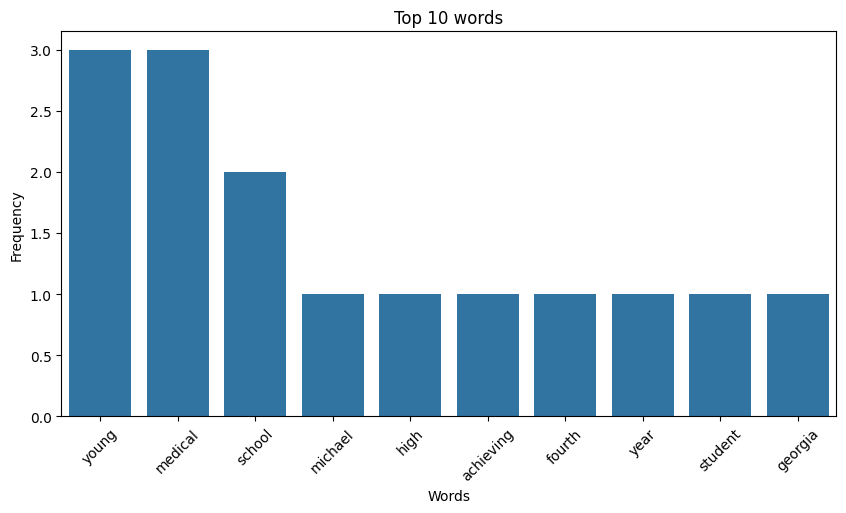

In [258]:
# create the tokens and remove stopwords, punctuation, and spaces, lowercase the words
tokens = [token.text.lower() for token in doc 
          if not token.is_stop and not token.is_punct and not token.is_space]

# Create a Counter
word_freq = Counter(tokens)

print(word_freq)

# Get the top 10 words and sort them alphabetically
top_10_words = word_freq.most_common(10)

# Unzip the words and frequencies
words, frequencies = zip(*top_10_words)

# Create a bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=words, y=frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words')
plt.xticks(rotation=45)
plt.show()

## 1-2. Sentence Detection
- When working with documents containing **multiple sentences**, it’s important to **separate each sentence** correctly.
- In **`spaCy`**, this process is much more **convenient** and **less error-prone** compared to using regular expressions.

In [259]:
sentences

"Michael Young is a high-achieving fourth-year medical\nstudent at Georgia Regents University who pulled himself up from rock\nbottom by changing the way he studies. Young entered medical school\nwithout the usual foundation of premed coursework. His classmates all had\nbackgrounds in biochemistry, pharmacology, and the like. Medical\nschool is plenty tough under any circumstances, but in Young's\ncase even more so for lack of a footing."

In [260]:
# same document, but initiate as the spaCy object...
doc = nlp(sentences)

- **Sentences are Stored as a Generator Object**  
  - Unlike a list, each sentence is stored as an item within a **generator object**.
  - **Advantages**:
    - Can be **iterated** using a `for` loop.
    - **More efficient memory usage** compared to storing sentences in a list.
  
🔗 [Learn More About Generators](https://wiki.python.org/moin/Generators)

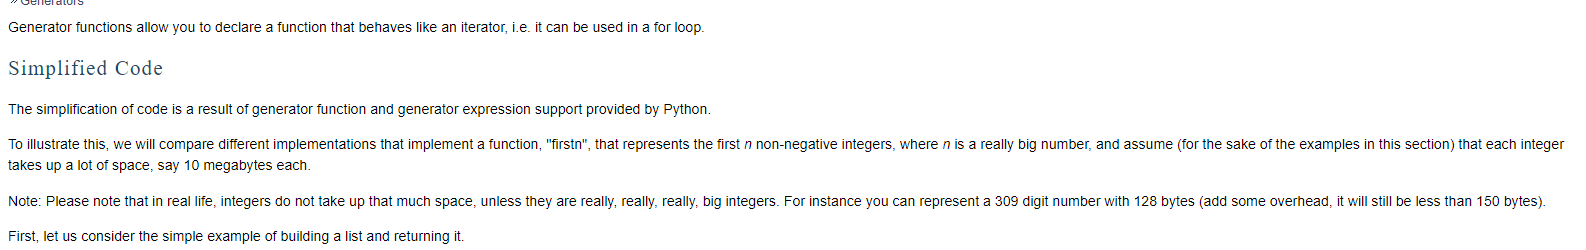

In [261]:
doc.sents

- Printing sentences with the index number

In [262]:
for i, sent in enumerate(doc.sents):
    print(i, sent)

0 Michael Young is a high-achieving fourth-year medical
student at Georgia Regents University who pulled himself up from rock
bottom by changing the way he studies.
1 Young entered medical school
without the usual foundation of premed coursework.
2 His classmates all had
backgrounds in biochemistry, pharmacology, and the like.
3 Medical
school is plenty tough under any circumstances, but in Young's
case even more so for lack of a footing.


## 1-3. Part-of-speech (POS) tagging

- **Finding Words with Specific Parts-of-Speech (POS)** 🏷️  
  - Different parts-of-speech provide distinct types of information:  
    - **Nouns**: Indicate the **subject** (e.g., *dog*, *city*).  
    - **Verbs**: Describe **actions** (e.g., *run*, *write*).  
    - **Adjectives**: Define the **qualities** of objects (e.g., *happy*, *large*).  

🔗 [Explore POS Tagging in spaCy](https://spacy.io/usage/linguistic-features#pos-tagging)

- **Yelp Review!**  
Capture the essence of customer feedback and analyze sentiment or extract key insights from real-world Yelp reviews.

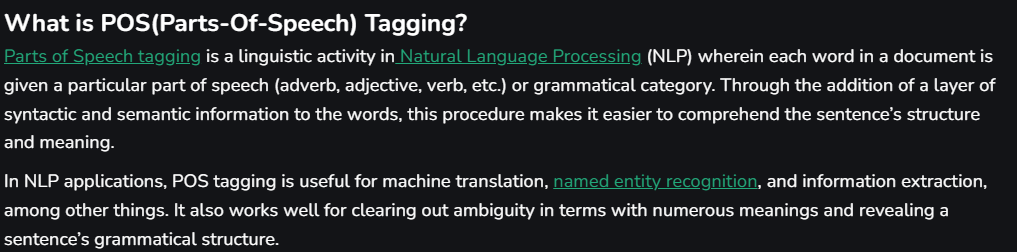

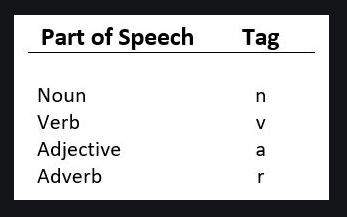

In [263]:
# from https://www.yelp.com/biz/ajishin-novi?hrid=juA4Zn2TX7845vNFn4syBQ&utm_campaign=www_review_share_popup&utm_medium=copy_link&utm_source=(direct)
text = """One of the best Japanese restaurants in Novi. Simple food, great taste, amazingly price. I visit this place a least twice month."""

- multiple sentences exist in a document
- Use the NLTK pakcage
https://www.nltk.org/book/ch05.html

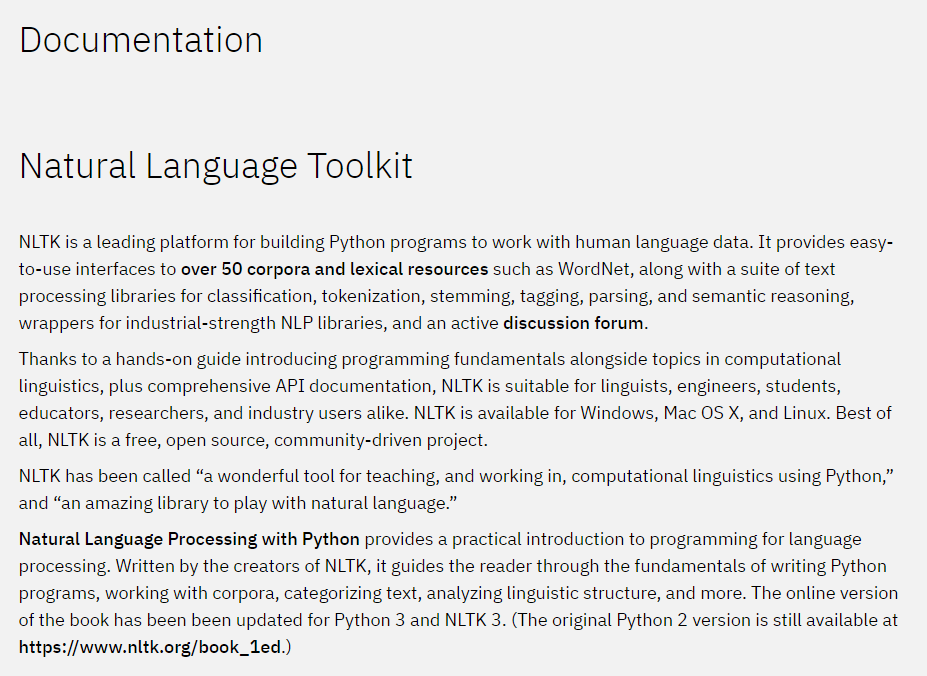

In [264]:
# Download the necessary resources
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /Users/jonasxie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jonasxie/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jonasxie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/jonasxie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [265]:

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text)

# Print the sentences
print(sentences)
print("\n")

# Iterate over each sentence
for sentence in sentences:
   # Tokenize each sentence into words
   words = nltk.word_tokenize(sentence)

   # Apply POS tagging to each word in the sentence
   pos_tags = nltk.pos_tag(words)

   # Print the POS tags
   print(pos_tags)

['One of the best Japanese restaurants in Novi.', 'Simple food, great taste, amazingly price.', 'I visit this place a least twice month.']


[('One', 'CD'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('Japanese', 'JJ'), ('restaurants', 'NNS'), ('in', 'IN'), ('Novi', 'NNP'), ('.', '.')]
[('Simple', 'JJ'), ('food', 'NN'), (',', ','), ('great', 'JJ'), ('taste', 'NN'), (',', ','), ('amazingly', 'RB'), ('price', 'NN'), ('.', '.')]
[('I', 'PRP'), ('visit', 'VBP'), ('this', 'DT'), ('place', 'NN'), ('a', 'DT'), ('least', 'JJS'), ('twice', 'JJ'), ('month', 'NN'), ('.', '.')]


# 🔍 How to Filter Out Adjectives
To filter out **adjectives** from your text using `NLTK`, identify words with the **POS tag** `"JJ"`, `"JJR"`, `"JJSS"`. 

### Example Code:
```python
# Using spaCy to filter adjectives
adjectives = [token.text for token in nlp(text) if token.pos_ == "ADJ"]
print("Adjectives found:", adjectives)

In [266]:
# Iterate over each sentence
for sentence in sentences:
    # Tokenize each sentence into words
    words = nltk.word_tokenize(sentence)

    # Apply POS tagging to each word in the sentence
    pos_tags = nltk.pos_tag(words)

    print(pos_tags)

    # Filter out adjectives (JJ, JJR, JJS)
    adjectives = [word for word, pos in pos_tags if pos in ['JJ', 'JJR', 'JJS']]

    # Print the adjectives in the current sentence
    print("Adjectives in sentence:", adjectives)

[('One', 'CD'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('Japanese', 'JJ'), ('restaurants', 'NNS'), ('in', 'IN'), ('Novi', 'NNP'), ('.', '.')]
Adjectives in sentence: ['best', 'Japanese']
[('Simple', 'JJ'), ('food', 'NN'), (',', ','), ('great', 'JJ'), ('taste', 'NN'), (',', ','), ('amazingly', 'RB'), ('price', 'NN'), ('.', '.')]
Adjectives in sentence: ['Simple', 'great']
[('I', 'PRP'), ('visit', 'VBP'), ('this', 'DT'), ('place', 'NN'), ('a', 'DT'), ('least', 'JJS'), ('twice', 'JJ'), ('month', 'NN'), ('.', '.')]
Adjectives in sentence: ['least', 'twice']


- Question: which words are adjectives (ADJ)?

In [267]:
for i, sent in enumerate(doc.sents):
    for token in sent:
        if token.pos_ == 'ADJ':
            print(token.text, "\t", token.pos_)

fourth 	 ADJ
medical 	 ADJ
medical 	 ADJ
usual 	 ADJ
premed 	 ADJ
like 	 ADJ
tough 	 ADJ


## Named Entity Recognition (NER)
**Named Entity Recognition (NER)** is a technique used to identify and classify key information (entities) in text, such as:

- 🏙️ **Locations** (e.g., *New York*, *Paris*)
- 👤 **People** (e.g., *Elon Musk*, *Marie Curie*)
- 💼 **Organizations** (e.g., *Google*, *United Nations*)
- 📅 **Dates** (e.g., *2024*, *Monday*)

NER helps extract structured information from unstructured text, making it easier to analyze real-world data.

In [268]:
doc = nlp(text)
print([(X.text, X.label_) for X in doc.ents])

[('One', 'CARDINAL'), ('Japanese', 'NORP'), ('Novi', 'ORG'), ('a least twice month', 'DATE')]


In [269]:
url = 'https://fivethirtyeight.com/features/remembering-alex-trebek-the-man-with-all-the-answers/'

In [270]:
# This code we are going to use beautiful soup to scrape the text from the website

from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html)
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string(url)
article = nlp(ny_bb)
len(article.ents)

105

In [271]:
article

 Remembering Alex Trebek, The Man With All The Answers | FiveThirtyEight Skip to main content FiveThirtyEight Search Search ABC News Menu Remembering Alex Trebek, The Man With All The Answers Share on Facebook Share on Twitter Politics Sports Science Podcasts Video Interactives ABC News   This is an archived site and is no longer being updated. New 538 articles can be found at www.abcnews.com/538.   Nov. 9, 2020, at 4:09 PM Remembering Alex Trebek, The Man With All The Answers By Oliver Roeder Filed under Jeopardy!     PHOTO ILLUSTRATION BY FIVETHIRTYEIGHT / GETTY IMAGES For decades, I’ve tuned into the trivia game show “Jeopardy!” for the facts. On Sunday, the show lost its judicious leader, Alex Trebek, who died at age 80 after a battle with cancer. Trebek had hosted “Jeopardy!” for my entire life. He began in 1984 and hosted every episode since — save for April Fool’s Day in 1997 when he and Pat Sajak of “Wheel of Fortune” swapped places — more than 8,000 half-hour shows in all. For

In [272]:
# Extract Named Entities and Their Labels

labels = [(x.label_,x.text) for x in article.ents]
Counter(labels)

Counter({('ORG', 'Trebek'): 16,
         ('WORK_OF_ART', 'Jeopardy'): 7,
         ('PERSON', 'Alex Trebek'): 5,
         ('WORK_OF_ART', 'The Man With All The Answers'): 2,
         ('DATE', '1984'): 2,
         ('PERSON', 'Alex'): 2,
         ('DATE', '2024'): 2,
         ('ORG', 'ABC News Internet Ventures'): 2,
         ('ORG', 'Search Search'): 1,
         ('WORK_OF_ART',
          'The Man With All The Answers Share on Facebook Share on Twitter Politics Sports Science Podcasts Video Interactives ABC News'): 1,
         ('CARDINAL', '538'): 1,
         ('DATE', 'Nov. 9, 2020'): 1,
         ('TIME', '4:09 PM'): 1,
         ('PERSON', 'Oliver Roeder Filed'): 1,
         ('DATE', 'decades'): 1,
         ('DATE', 'Sunday'): 1,
         ('DATE', 'age 80'): 1,
         ('DATE', 'April Fool’s Day'): 1,
         ('DATE', '1997'): 1,
         ('PERSON', 'Pat Sajak'): 1,
         ('WORK_OF_ART', 'Wheel of Fortune'): 1,
         ('CARDINAL', 'more than 8,000 half-hour'): 1,
         ('DATE', 

In [273]:
# Counts the frequency of each entity type (label) in the article
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 29,
         'PERSON': 23,
         'DATE': 17,
         'WORK_OF_ART': 14,
         'CARDINAL': 9,
         'GPE': 5,
         'NORP': 3,
         'TIME': 2,
         'LOC': 1,
         'FAC': 1,
         'PRODUCT': 1})

In [274]:
labels

['PERSON',
 'WORK_OF_ART',
 'ORG',
 'PERSON',
 'WORK_OF_ART',
 'CARDINAL',
 'DATE',
 'TIME',
 'PERSON',
 'WORK_OF_ART',
 'PERSON',
 'DATE',
 'WORK_OF_ART',
 'DATE',
 'PERSON',
 'DATE',
 'ORG',
 'WORK_OF_ART',
 'DATE',
 'DATE',
 'DATE',
 'PERSON',
 'WORK_OF_ART',
 'CARDINAL',
 'ORG',
 'DATE',
 'CARDINAL',
 'ORG',
 'WORK_OF_ART',
 'DATE',
 'GPE',
 'PERSON',
 'PERSON',
 'GPE',
 'ORG',
 'NORP',
 'PERSON',
 'LOC',
 'WORK_OF_ART',
 'ORG',
 'ORG',
 'ORG',
 'DATE',
 'DATE',
 'CARDINAL',
 'DATE',
 'PERSON',
 'PERSON',
 'WORK_OF_ART',
 'DATE',
 'ORG',
 'CARDINAL',
 'ORG',
 'GPE',
 'WORK_OF_ART',
 'ORG',
 'WORK_OF_ART',
 'NORP',
 'PERSON',
 'WORK_OF_ART',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'FAC',
 'ORG',
 'NORP',
 'ORG',
 'ORG',
 'PERSON',
 'PERSON',
 'ORG',
 'ORG',
 'CARDINAL',
 'PRODUCT',
 'PERSON',
 'ORG',
 'ORG',
 'ORG',
 'PERSON',
 'PERSON',
 'CARDINAL',
 'TIME',
 'ORG',
 'DATE',
 'CARDINAL',
 'GPE',
 'DATE',
 'PERSON',
 'WORK_OF_ART',
 'ORG',
 'PERSON',
 'WORK_OF_ART',
 'ORG',
 'G

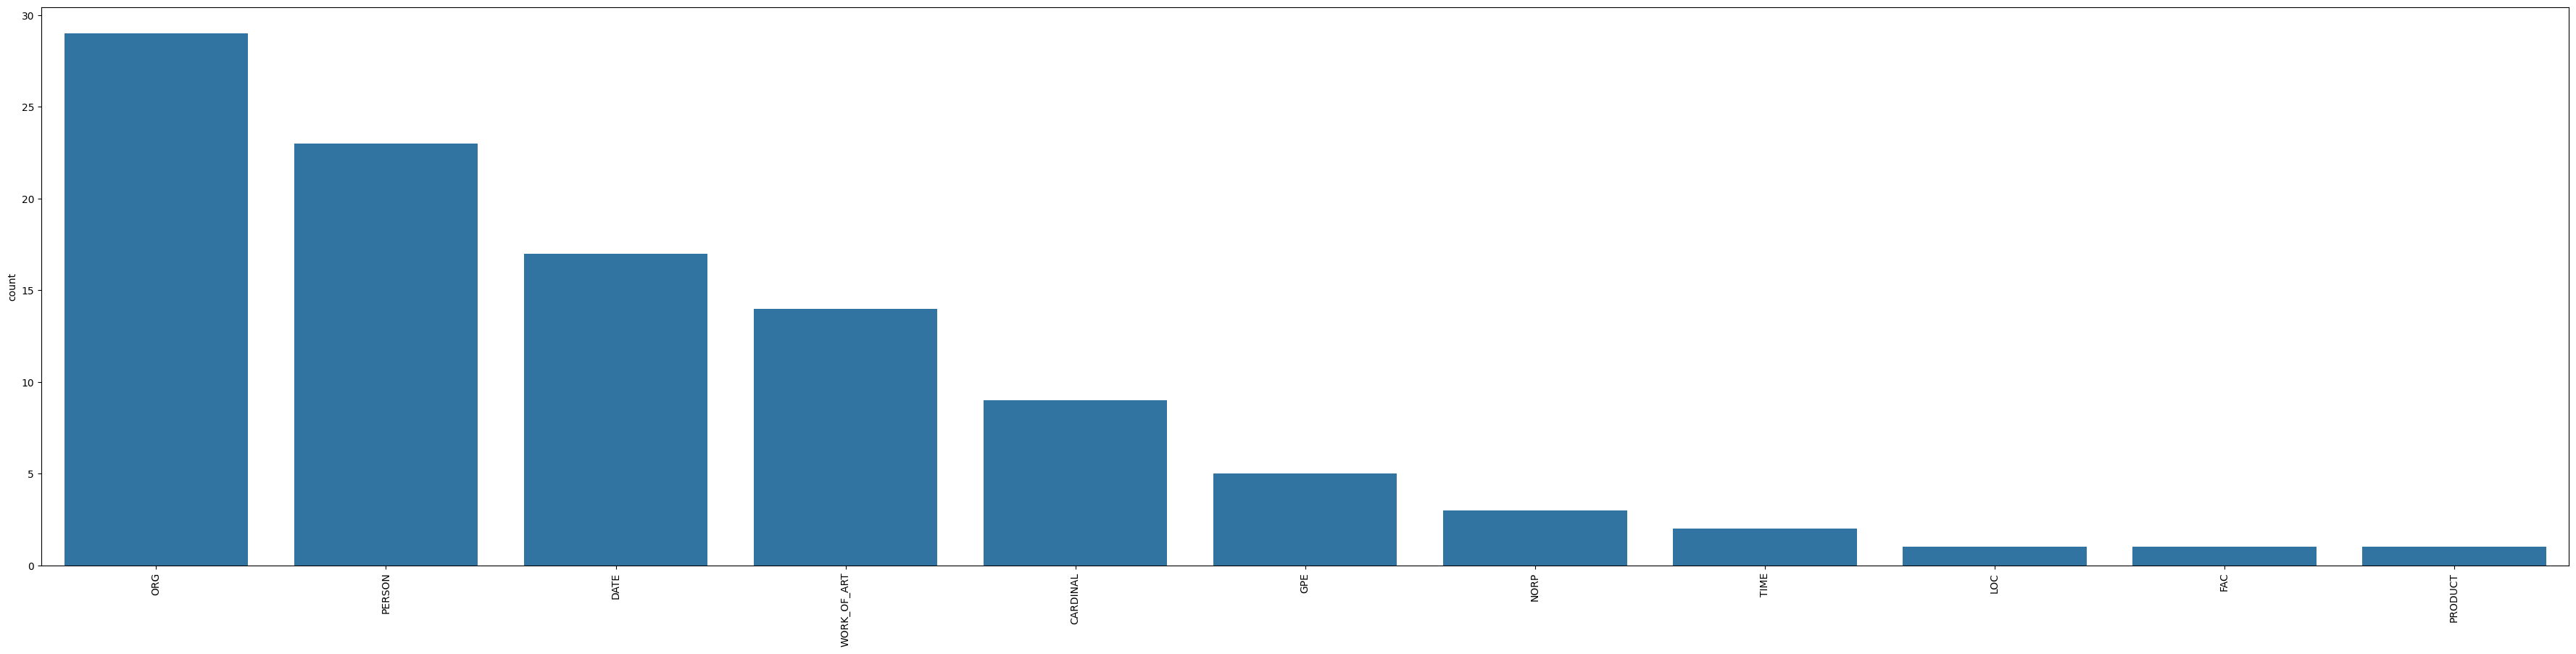

In [275]:
# Plot the frequency of each entity type
plt.figure(figsize=(45,10))
sns.countplot(x=labels, order=pd.Series(labels).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

# BREAK

# NLP Part II

## 1. Word Embeddings
Word embeddings are a type of word representation that allows words to be expressed in a continuous vector space. These vectors capture semantic meanings and relationships between words, making them valuable for various Natural Language Processing (NLP) tasks.

By representing words as vectors, embeddings can reflect similarities based on the context in which words are used, enabling models to learn patterns such as synonyms, analogies, and semantic associations.


- Word embeddings were initially popularized by the [Word2Vec model developed by Mikolov et al., 2013](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf).
- Modern embeddings are often derived from more advanced transformer models like [BERT](https://arxiv.org/abs/1810.04805) or [sentence-transformers](https://www.sbert.net/).
  - These models use deep learning architectures to generate contextualized vectors for words and sentences.
- Interestingly, word vectors generated by these models can capture complex semantic relationships.
- You can find more details in the [Hugging Face documentation](https://huggingface.co/transformers/) on how these embeddings work.

You will need to use a pre-trained language model from the Hugging Face library. One recommended model is the [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2), which is smaller in size and efficient for generating embeddings.

In [276]:
#!pip install -U langchain-community

In [277]:
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.embeddings import HuggingFaceEmbeddings


from transformers import AutoModel, AutoTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import torch
import seaborn as sns

There are several pre-trained models available through the Hugging Face library that you can access. 🔗 You can explore a comprehensive list of models on the [Hugging Face Models Hub](https://huggingface.co/models).

Some commonly used models for embeddings include:

- 💡 [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2): A small and efficient model ideal for many NLP tasks.
- 🚀 [all-mpnet-base-v2](https://huggingface.co/sentence-transformers/all-mpnet-base-v2): A powerful model for sentence embeddings with strong performance.
- 🔍 [distilbert-base-nli-stsb-mean-tokens](https://huggingface.co/sentence-transformers/distilbert-base-nli-stsb-mean-tokens): A distilled version of BERT optimized for semantic similarity tasks.

You can choose a model based on your specific requirements and memory constraints. 

In [278]:
# Load a pre-trained Word2Vec model using langchain-huggingface
w2v_mod = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Use the 'w2v_model' to generate embeddings for your words or text data.
sentence = "Natural Language Processing is fascinating!"
sentence_embedding = w2v_mod.embed_documents([sentence])[0]
print(f"Sentence Embedding: {sentence_embedding}")

Sentence Embedding: [0.015458707697689533, -0.08523175865411758, 0.06185731291770935, 0.005202450789511204, 0.019506879150867462, -0.02522248774766922, -0.010481203906238079, -0.05799810215830803, 0.02971806190907955, 0.009420055896043777, -0.025660594925284386, 0.06460516899824142, 0.003681957023218274, 0.004933551419526339, 0.0114364642649889, 0.04607769846916199, -0.01082372572273016, 0.009545005857944489, -0.1037793681025505, -0.10541045665740967, 0.04510720074176788, 0.04889978468418121, -0.00857932586222887, -0.05570885166525841, 0.013682871125638485, 0.07685630768537521, -0.025808660313487053, -0.05905752256512642, 0.10730947554111481, -0.06416449695825577, 0.006153501104563475, 0.10176943987607956, 0.06198703125119209, 0.09582763910293579, -0.02949688956141472, 0.02307024411857128, -0.0037727670278400183, 0.0383361354470253, 0.03173184022307396, 0.01764153316617012, -0.04290470480918884, -0.00791178084909916, 0.03314347192645073, -0.010558806359767914, 0.09687443822622299, 0.05

## 1-1. Calculating Similarity Between Words 📏
- **Question**: What's the similarity between *school* and *student*?

We can use pre-trained embeddings to calculate the similarity between these two words. By converting each word into its vector representation and computing the cosine similarity, we can measure how similar they are in terms of semantics.

- The word vector for *school* looks like this:
```python
# Generate and print the word vector for 'school'
word = "school"
word_vector = w2v_mod.embed_documents([word])[0]  # Generate the embedding for 'school'
print(f"Word vector for '{word}':\n{word_vector}")

In [279]:
# Load the pre-trained embeddings model
w2v_mod = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Define the words
word1 = "school"
word2 = "student"

# Generate embeddings for each word
embedding1 = w2v_mod.embed_documents([word1])[0]
embedding2 = w2v_mod.embed_documents([word2])[0]

# Calculate the cosine similarity
similarity = cosine_similarity([embedding1], [embedding2])[0][0]

print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")
print("\n")

word = "school"
word_vector = w2v_mod.embed_documents([word])[0]  # Generate the embedding for 'school'
print(f"Word vector for '{word}':\n{word_vector}")


Similarity between 'school' and 'student': 0.6501


Word vector for 'school':
[-0.01404428668320179, 0.07605957984924316, 0.01428942196071148, 0.06901493668556213, -0.005906858015805483, -0.029542846605181694, 0.0707707405090332, 0.007752066012471914, 0.07736503332853317, 0.0660303607583046, 0.06576496362686157, -0.018840692937374115, -0.005301161669194698, 0.019456524401903152, 0.0012496584095060825, -0.004245004151016474, 0.0019151512533426285, -0.044267915189266205, -0.05319434404373169, -0.10904967039823532, -0.018956659361720085, 0.009061523713171482, -0.022509461268782616, 0.055739760398864746, 0.03707210347056389, 0.13534699380397797, 0.019771257415413857, -0.06413459777832031, -0.06690508872270584, -0.12333444505929947, -0.026096433401107788, 0.007687141187489033, -0.009485224261879921, -0.008968645706772804, -0.014978584833443165, 0.051523491740226746, 0.0735410675406456, 0.002737951697781682, 0.04844813421368599, -0.009411445818841457, -0.04946734383702278, -0.025429580360651

In [280]:
len(word_vector)

384

### 🚀 **Challenge 5:** Find a Word Similar to *School* </font>

To find a word that is more similar to *school*, we can generate word embeddings for a list of candidate words and compute the cosine similarity between each candidate and *school*. The word with the highest similarity score will be considered the closest in meaning to *school*.

**Steps**:
1. Create a list of **candidate words** related to education and general nouns (e.g., *student*, *teacher*, *book*).
2. Generate embeddings for each word using the model.
3. Calculate the **cosine similarity** between each word and *school*.
4. Identify the word with the **highest similarity score**.
5. 🎯 **Output**: Display the most similar word along with its similarity score.

---

In [281]:
# Create a list of candidate words realted to education
candidates = ['student', 'teacher', 'classroom', 'university', 'college', 'education', 'learning', 'knowledge', 'study']

# Generate embeddings for each candidate word
candidate_vectors = w2v_mod.embed_documents(candidates)

# Calculate the cosine similarity
similarities = cosine_similarity([word_vector], candidate_vectors)[0]

print(f'Similarities between "{word}" and the candidate words:')
for candidate, similarity in zip(candidates, similarities):
    print(f'{candidate}: {similarity:.4f}')


Similarities between "school" and the candidate words:
student: 0.6501
teacher: 0.6174
classroom: 0.6766
university: 0.6432
college: 0.7336
education: 0.7359
learning: 0.5391
knowledge: 0.4186
study: 0.5218


### 🚀 **Challenge 6:** Find Two Words with Cosine Similarity Less Than 0.1 </font>

- **Task**: Identify two words whose embeddings have a very low cosine similarity (less than 0.1).

- **Interpretation**: A cosine similarity less than 0.1 indicates that the words are semantically very different or unrelated in the context of the given model.

**Steps**:
1. Create a **list of words** from various categories (e.g., *school*, *mountain*, *happiness*, *car*).
2. Calculate pairwise **cosine similarity** for each combination.
3. Identify word pairs with **similarity less than 0.1**.
4. 🎯 **Output**: Display the word pairs with the similarity score and a brief analysis of why they are dissimilar.

---

In [282]:
# Create a list of candidate words from various categories
candidates = ['school', 'teacher', 'car', 'transport', 'rabbit', 'apartment', 'cat', 'gpt', 'computer', 'michigan', 'china', 'homework', 'valorant', 'pasta']

# Calculate pairwise cosine similarities
candidate_vectors = w2v_mod.embed_documents(candidates)
similarities = cosine_similarity(candidate_vectors)

# Display the similarities and excluding the self-correlation
df = pd.DataFrame(similarities, index=candidates, columns=candidates)

# excluding duplicates and reset it as a dataframe
mask = np.triu(np.ones_like(df, dtype=bool))
df = df.mask(mask)

In [283]:
df = df.stack().reset_index()
df.columns = ['Word 1', 'Word 2', 'Cosine_Similarity']
df['Cosine_Similarity'].describe()

count    91.000000
mean      0.298657
std       0.110729
min       0.053708
25%       0.210053
50%       0.287297
75%       0.370678
max       0.617379
Name: Cosine_Similarity, dtype: float64

In [284]:
df_low = df[df['Cosine_Similarity'] < 0.1]
df_low


,Word 1,Word 2,Cosine_Similarity
69,valorant,transport,0.053708


The only pair of words that has a cosine similarity less than 0.1 is *valorant* and *transport*. "Valorant" is a popular first-person shooter game. It is clearly unrelated to "transport" in terms of semantics, leading to a low similarity score.

### 🚀 **Challenge 7:** Try More Word Comparisons! </font>

- **Task**: Experiment with at least **two additional word pairs** using the model and analyze the results. Are there any interesting patterns or unexpected findings?

**Steps**:
1. Choose **two new pairs of words** that you think may have interesting relationships.
2. Calculate the **cosine similarity** between the words.
3. 🎯 **Output**: Print the similarity scores and provide your interpretation.
---

In [285]:
pairs = ['michigan', 'championship', 'china', 'panda']
pair_vectors = w2v_mod.embed_documents(pairs)
pair_similarities = cosine_similarity(pair_vectors)
df_pairs = pd.DataFrame(pair_similarities, index=pairs, columns=pairs)
df_pairs

,michigan,championship,china,panda
michigan,1.000000,0.436554,0.534231,0.161627
championship,0.436554,1.000000,0.273994,0.192367
china,0.534231,0.273994,1.000000,0.314739
panda,0.161627,0.192367,0.314739,1.000000


I choose two pairs: Michigan and championship, China and panda. The cosine similarity between Michigan and championship is 0.44, indicating a moderate relationship. I guess the relationship is based on U-M's football performance. Especially they just won the national championship.
The cosine similarity between China and panda is 0.31, suggesting a mild connection. I originally thought the similarity would be higher, as pandas are the symbol of China. But it seems that the model does not consider pandas as a defining feature of China.

## 🔍 1-2. Analogy from Word Vectors 

Analogies can be solved using word vectors by leveraging the relationships between words in a vector space. A common example is:

<center>
**"King" - "Man" + "Woman" = ?** 🤔  
</center>

This equation represents the idea of taking the vector for *King*, subtracting the semantic features of *Man*, and adding the features of *Woman*. The resulting vector should be closest to the vector for *Queen*. Such analogies demonstrate how word embeddings capture semantic and syntactic relationships between words.

### How to Perform Analogy Operations:
1. **Calculate the word vectors** for the given words.
2. Use vector arithmetic: `vector1 - vector2 + vector3`.
3. **Find the word** whose vector is closest to the resulting vector.


<img src="https://www.tensorflow.org/images/linear-relationships.png" width="800">

#### Can we approximate the relationship between words by doing - and + operations?

- $ Spain - Germany \approx x -  Berlin $
- $\rightarrow Spain - Germany + Berlin \approx ?$


In [286]:
from transformers import AutoModel, AutoTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import torch
import numpy as np

# Load the pre-trained model and tokenizer from the transformers library
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Define the analogy parameters
positive_words = ["Spain", "Berlin"]
negative_word = "Germany"

# Function to get embeddings for a word
def get_embedding(word):
    tokens = tokenizer(word, return_tensors="pt")
    with torch.no_grad():
        embedding = model(**tokens).last_hidden_state[0][0].numpy()
    return embedding

# Get the word embeddings for positive and negative sets
positive_vectors = [get_embedding(word) for word in positive_words]
negative_vector = get_embedding(negative_word)

# Calculate the analogy vector: (Spain + Berlin) - Germany
analogy_vector = np.sum(positive_vectors, axis=0) - negative_vector

# Define a list of candidate words to find the closest match
candidate_words = ["Madrid", "Paris", "Rome", "Lisbon", "Athens"]

# Calculate cosine similarity between analogy vector and each candidate word
max_similarity = -1
best_word = None

for word in candidate_words:
    candidate_vector = get_embedding(word)
    similarity_score = cosine_similarity([analogy_vector], [candidate_vector])[0][0]
    print(f"Similarity with '{word}': {similarity_score:.4f}")
    
    # Identify the most similar word
    if similarity_score > max_similarity:
        max_similarity = similarity_score
        best_word = word

print(f"\nThe word that best fits the analogy '{positive_words[0]} + {positive_words[1]} - {negative_word}' is: **{best_word}** with a similarity score of {max_similarity:.4f}.")

Similarity with 'Madrid': 0.8037
Similarity with 'Paris': 0.6807
Similarity with 'Rome': 0.7066
Similarity with 'Lisbon': 0.6947
Similarity with 'Athens': 0.6195

The word that best fits the analogy 'Spain + Berlin - Germany' is: **Madrid** with a similarity score of 0.8037.


### 🚀 **Challenge 8:** Any Other Interesting Examples? </font>

- **Task**: Explore three more analogies that do **not** involve capital cities. Test relationships between objects, professions, or any other categories.  
- **Interpretation**: Analyze how well the model captures these relationships and identify any interesting patterns.


In [287]:
positive_words = ['Queen', 'Man']
negative_words = ['Woman']

candidates = ['King', 'Sir', 'Father', 'Duchy', 'Minister']

positive_vectors = [get_embedding(word) for word in positive_words]
negative_vector= get_embedding(negative_words[0])
candidate_vector = [get_embedding(word) for word in candidates]
analogy_vector = np.sum(positive_vectors, axis=0) - negative_vector
analogy_vector = analogy_vector.reshape(1, -1)  # Reshape to 2D array
similarities = cosine_similarity(analogy_vector, candidate_vector)

for word, similarity in zip(candidates, similarities[0]):
    print(f"Similarity with '{word}': {similarity:.4f}")



Similarity with 'King': 0.8121
Similarity with 'Sir': 0.7366
Similarity with 'Father': 0.6458
Similarity with 'Duchy': 0.5841
Similarity with 'Minister': 0.7163


I think the model does a pretty good job. It correctly specifies that "King" is the most similar word for "Queen - Woman + Man". 

## 1-3. Constructing Interpretable Semantic Scales 

So far, we've seen that word vectors effectively carry semantic information, even if not perfectly. But can we design more **interpretable** results using the semantic space?

### Goal: Create a Visual Representation of Word Relationships
In this section, we'll explore how to build **semantic scales**—representations that map words onto interpretable axes (e.g., *bad-good*, *weak-strong*, etc.).

### Example: Mapping Political Words on a *Bad-Good* Scale
Let’s see how we can map words associated with *politics* onto a *Bad-Good* scale using **Principal Component Analysis (PCA)** to visualize the word vectors.


- Let's re-try with real datapoints in [here](https://projector.tensorflow.org): *politics* words in a *bad-good* PCA space

In [288]:
from scipy import spatial
import pandas as pd
 
def cosine_similarity(x, y):
    return (1 - spatial.distance.cosine(x, y))

- Can we regenerate this results with our embedding model?

### 📊 Let's Plot Words in a 2D Space Using the *Bad-Good* Axes 

- **Objective**: Visualize words in a 2D space using the *Bad* and *Good* semantic axes.
- **Approach**: Calculate the **cosine similarity** between each evaluating word (*violence*, *discussion*, and *issues*) and the two endpoints (*bad* and *good*).
- **Words to Evaluate**: 
  - *Violence*: Expected to be closer to the *Bad* axis.
  - *Discussion*: May lie between *Good* and *Bad* based on the context.
  - *Issues*: Should lean towards *Good*, but could vary.
- **Goal**: Determine where these words fall on the scale and interpret the results visually.

In [289]:
# Generate embeddings for the words
violence_vec = get_embedding("violence")
discussion_vec = get_embedding("discussion")
issues_vec = get_embedding("issues")
good_vec = get_embedding("good")
bad_vec = get_embedding("bad")

# Define cosine similarity function
from scipy.spatial.distance import cosine

def cosine_similarity(x, y):
    return 1 - cosine(x, y)

# Create a DataFrame with cosine similarities
pol_words_sim_2d = pd.DataFrame([
    [cosine_similarity(violence_vec, good_vec), cosine_similarity(violence_vec, bad_vec)],
    [cosine_similarity(discussion_vec, good_vec), cosine_similarity(discussion_vec, bad_vec)],
    [cosine_similarity(issues_vec, good_vec), cosine_similarity(issues_vec, bad_vec)]
], index=['violence', 'discussion', 'issues'], columns=['good', 'bad'])

print(pol_words_sim_2d)


                good       bad
violence    0.783698  0.774067
discussion  0.917206  0.902372
issues      0.900693  0.902916


In [290]:
print(violence_vec)

[ 3.64815056e-01 -7.37407506e-02 -6.31440803e-02  1.64244011e-01
  1.23705417e-01  4.20358062e-01 -1.29833937e-01 -2.61642516e-01
  1.13431737e-01  2.15896189e-01  1.84143230e-01 -5.74599244e-02
  1.21382818e-01 -2.10403189e-01  1.88726023e-01 -1.23610958e-01
 -5.75273484e-02  3.08459669e-01  1.35629907e-01  9.40092141e-05
 -7.62851089e-02  3.32506478e-01  2.59658217e-01 -1.01309180e-01
 -3.79906833e-01  1.46756440e-01 -7.61457756e-02  3.78946036e-01
 -9.14345533e-02 -6.66247368e-01  1.60753518e-01 -3.61845493e-01
 -2.81924717e-02  1.58465073e-01 -2.32764617e-01 -3.81518364e-01
  4.07590359e-01  3.31287235e-01  3.01429592e-02 -2.05548078e-01
 -2.34013304e-01  9.87665206e-02  1.31988481e-01 -1.25434190e-01
 -1.57659855e-02  3.21205147e-02 -3.70308578e-01 -7.80055448e-02
 -1.02085590e-01 -2.58995235e-01 -1.33932590e-01 -1.18327318e-02
 -1.48327515e-01  1.44804507e-01  1.46860555e-01 -3.13063413e-01
  6.09013438e-01  3.08881700e-01  3.26560527e-01  1.20130531e-01
 -1.39229715e-01  3.18709

In [291]:
pol_words_sim_2d

,good,bad
violence,0.783698,0.774067
discussion,0.917206,0.902372
issues,0.900693,0.902916


- If we plot this:

<Axes: xlabel='good', ylabel='bad'>

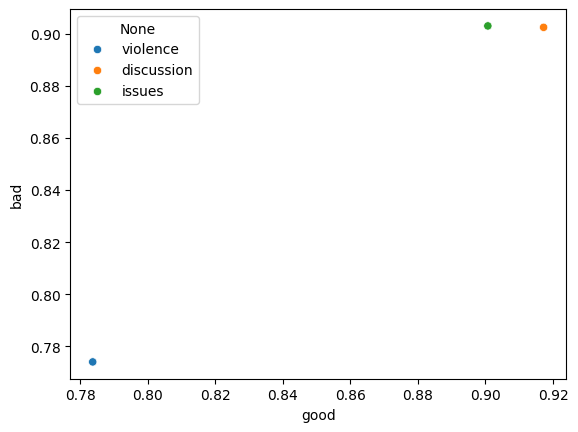

In [292]:
sns.scatterplot(x='good', y='bad', data=pol_words_sim_2d, hue=pol_words_sim_2d.index)

- violence: less good, more bad
- discussion: less bad, more good
- issues: both bad and good

###  Can We Map Words on a 1D Scale?  
**(bad)** -------------------- ? -------------------- **(good)**

- **Objective**: Map words onto a 1D scale between the two endpoints (*bad* and *good*).
- **Approach**:
  1. **Create the Vector for the *Bad-Good* Scale**:  
     - Calculate a directional vector that spans between *bad* and *good*.  
     - This vector will serve as the **semantic axis** for evaluation.
  2. **Project Each Word** onto This Scale:
     - Calculate the cosine similarity between each word (e.g., *violence*, *discussion*, *issues*) and the *bad-good* vector.
     - This score will determine where the word is placed on the 1D scale.
  
- **Visual Representation**:
  - Words like *violence* should ideally be closer to the **(bad)** end.
  - Words like *justice* or *freedom* should align closer to the **(good)** end.
  

#### First, let's create the vector for *bad-good* scale

- To construct a **Bad-Good scale vector**, follow these steps:

    1. Generate word embeddings for **"bad"** and **"good"**.
    2. Subtract the *bad* embedding from the *good* embedding to get a directional vector:
    
        $
            \text{Bad-Good Vector} = \text{Good\_Vector} - \text{Bad\_Vector}
        $

- This resulting vector will serve as the semantic axis, allowing us to place other words along the *Bad-Good* continuum.

In [293]:
bad_embedding = get_embedding('bad')
good_embedding = get_embedding('good')

bad_good_vector = good_embedding - bad_embedding

print(f"Bad-Good Vector:\n{bad_good_vector}")

Bad-Good Vector:
[-4.21556979e-02  2.81574875e-02 -1.47654548e-01  2.26090446e-01
  1.05590105e-01 -2.96810642e-02 -4.92561832e-02  7.02896863e-02
  3.94815356e-02  3.19033116e-02  1.11319400e-01  5.54864146e-02
  7.79413506e-02  1.72712579e-01 -2.65673995e-02  1.04522973e-01
  4.39911932e-02  3.45615409e-02  8.68170857e-02 -1.89359516e-01
 -1.21256247e-01 -9.23499316e-02  1.84438482e-01 -1.19452700e-01
  6.53278530e-02  2.29925945e-01  8.19054767e-02  5.52087501e-02
  1.96161121e-02  1.52920425e-01 -1.26510844e-01 -1.71235651e-02
 -1.24393031e-01  3.71296555e-02 -3.67158912e-02  1.44887328e-01
  1.38407946e-01 -2.59498477e-01  8.57779533e-02 -3.08213979e-02
  1.13445207e-01 -1.33412868e-01  1.73219681e-01  1.05623022e-01
 -5.95816746e-02  1.36650115e-01 -2.36089483e-01  2.57764220e-01
  8.71912241e-02 -2.20580637e-01 -3.06098908e-02 -1.99145198e-01
 -9.28062350e-02 -1.72909588e-01  5.53650856e-02 -8.84337425e-02
  1.19201273e-01  2.62112617e-02  5.85456453e-02 -2.13754192e-01
 -1.0653

- Calculate the cosine similarity score of the word *violence* in the *bad-good* scale 
    - $sim(V(violence), V(bad) - V(good))$

In [294]:
# Custom function to calculate cosine similarity for 1-D vectors
def cosine_similarity_1d(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    return dot_product / (norm_vector1 * norm_vector2)


In [295]:
# Calculate cosine similarity with the Bad-Good vector
violence_score = cosine_similarity_1d(violence_vec, bad_good_vector)
discussion_score = cosine_similarity_1d(discussion_vec, bad_good_vector)
issues_score = cosine_similarity_1d(issues_vec, bad_good_vector)

# Display the similarity scores
print(f"Cosine Similarity with Bad-Good Vector:\n")
print(f"Violence: {violence_score:.4f} (Closer to {'Good' if violence_score > 0 else 'Bad'})")
print(f"Discussion: {discussion_score:.4f} (Closer to {'Good' if discussion_score > 0 else 'Bad'})")
print(f"Issues: {issues_score:.4f} (Closer to {'Good' if issues_score > 0 else 'Bad'})")

Cosine Similarity with Bad-Good Vector:

Violence: -0.1504 (Closer to Bad)
Discussion: -0.1638 (Closer to Bad)
Issues: -0.2185 (Closer to Bad)


## ✨ 2. Sentiment Analysis with NLTK 

**The Natural Language Toolkit (NLTK)** is a powerful suite of libraries and programs designed for symbolic and statistical natural language processing in Python, primarily for English text.

For more information, check out the official documentation: [NLTK Documentation](https://www.nltk.org/).

### 🔍 What We’ll Do:
We will use **NLTK** along with **spaCy** to analyze text and determine its sentiment:
- **Positive** 😄
- **Negative** 😞
- **Neutral** 😐

"The Natural Language Toolkit (NLTK) is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language."
for more information see: https://www.nltk.org/

In [296]:
# adapted from https://github.com/Jcharis/Natural-Language-Processing-Tutorials/blob/master/NLP%20with%20SpaCy-%20Adding%20Extensions%20Attributes%20in%20SpaCy(How%20to%20use%20sentiment%20analysis%20in%20SpaCy).ipynb
import nltk
import spacy
from spacy.tokens import Doc

"VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media."

for more see: https://github.com/cjhutto/vaderSentiment

In [297]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jonasxie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Step 1: Load the spaCy language model

In [298]:
nlp = spacy.load("en_core_web_sm")

### Step 2: Define a function to calculate the sentiment score

In [299]:
def sentiment_scores(doc):
    # Simple sentiment logic based on presence of positive/negative words
    positive_words = ["great", "good", "amazing", "excellent", "fantastic"]
    negative_words = ["terrible", "bad", "awful", "poor", "horrible"]

    # Calculate the sentiment score
    score = sum([1 if word.text.lower() in positive_words else -1 if word.text.lower() in negative_words else 0 for word in doc])

    # Return the sentiment as a dictionary
    return {"sentiment": "positive" if score > 0 else "negative" if score < 0 else "neutral"}


### Step 3: Set the custom extension for sentiment analysis

In [300]:
Doc.set_extension("sentimenter", getter=sentiment_scores, force=True)

### Step 4: Apply the sentiment analysis to a sample text


In [301]:
doc = nlp("This introduction was great but the conclusions were terrible")

### Step 5: Access the sentiment score using the custom extension

In [302]:
print(doc._.sentimenter)

{'sentiment': 'neutral'}


### 🛒 Applying Sentiment Analysis to Amazon Product Reviews

In [303]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the reviews dataset
url = 'https://raw.githubusercontent.com/umsi-data-science/data/main/small_reviews.csv'
reviews = pd.read_csv(url, index_col=0)

reviews.head()

,Score,Summary,Text
244509,4,Love Happy Tot,I just love the happy tot baby food line. It s...
87295,4,Feelin Hot Hot Hot,Curry has become one of my favorite foods over...
377094,5,Wow. Very Maple-y,"Just tried this for the first time, and I'm qu..."
44261,4,"Good dark, rich coffee for breakfast time",After trying lots of different blends in K-Cup...
398439,5,Fantastic coffee!,"Exceptional coffee all around - rich, full, wi..."


We'll use the apply function to transform text with spacy's nlp function.

In [304]:
sent_analyzer = SentimentIntensityAnalyzer()

In [305]:
# Apply VADER sentiment analysis to calculate compound sentiment score
reviews['compound_sentiment_rating'] = reviews['Text'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

# Display the first few rows to check results
reviews[['Text', 'compound_sentiment_rating']].head()

,Text,compound_sentiment_rating
244509,I just love the happy tot baby food line. It s...,0.9558
87295,Curry has become one of my favorite foods over...,0.9742
377094,"Just tried this for the first time, and I'm qu...",0.9383
44261,After trying lots of different blends in K-Cup...,0.8476
398439,"Exceptional coffee all around - rich, full, wi...",0.5983


In [306]:
reviews[['Score','compound_sentiment_rating','Text']].head(10)

,Score,compound_sentiment_rating,Text
244509,4,0.9558,I just love the happy tot baby food line. It s...
87295,4,0.9742,Curry has become one of my favorite foods over...
377094,5,0.9383,"Just tried this for the first time, and I'm qu..."
44261,4,0.8476,After trying lots of different blends in K-Cup...
398439,5,0.5983,"Exceptional coffee all around - rich, full, wi..."
269511,5,0.9652,These are a delicious vegan alternative to reg...
89042,1,-0.6048,I have never cared for sweetened cereal as I w...
225284,3,0.8029,I've been looking for dried organic mango that...
92943,3,-0.1971,"This meal-in-a-box was alright, but not amazin..."
22875,4,0.2732,This product works well with most kinds of mea...


In [307]:
reviews.iloc[6].Text

"I have never cared for sweetened cereal as I was not raised on it. When I found Purely O's a few years ago I was happy to have found a cereal that did not contain sugar or corn products which I need to avoid because of a corn allergy.  I had intended to buy another box today. I took the time to read the label to make sure that nothing had changed. I could not believe that the ingredient list now lists CORN!  I am so angry!  Purely O's were my go-to breakfast when I needed a something quick or was in the mood for cereal.  There is nothing that this  company makes that I can now eat.  When will these people learn humans aren't pigs! Everything in a supermarket should not contain corn!  If I had wanted corny oat cereal I would have bought Cheerios."

<Axes: xlabel='Score', ylabel='compound_sentiment_rating'>

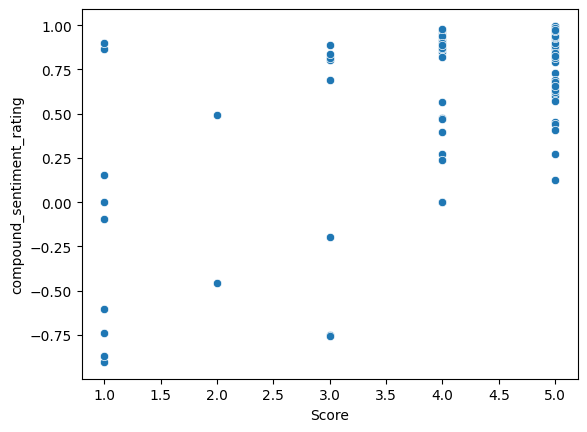

In [308]:
sns.scatterplot(x='Score',y='compound_sentiment_rating',data=reviews)

In [309]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [310]:
model0 = smf.ols("compound_sentiment_rating ~ Score ", data=reviews)
model0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     compound_sentiment_rating   R-squared:                       0.430
Model:                                   OLS   Adj. R-squared:                  0.424
Method:                        Least Squares   F-statistic:                     73.92
Date:                       Thu, 10 Oct 2024   Prob (F-statistic):           1.32e-13
Time:                               15:46:00   Log-Likelihood:                -38.820
No. Observations:                        100   AIC:                             81.64
Df Residuals:                             98   BIC:                             86.85
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3960      0.128     -3.094      0.003      -0.650      -0.142
Score          0.2508      0.029      8.598      0.000       0.193       0.309
==============================================================================
Omnibus:                       11.481   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.888
Skew:                          -0.548   Prob(JB):                     0.000355
Kurtosis:                       4.617   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""